In [1]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.ensemble import AdaBoostRegressor
# 加载数据
data=load_boston()
# 分割数据
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size=0.25, random_state=33)
# 使用AdaBoost回归模型
regressor=AdaBoostRegressor()
regressor.fit(train_x,train_y)
pred_y = regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print("房价预测结果 ", pred_y)
print("均方误差 = ",round(mse,2))

房价预测结果  [18.98163265 10.43055556 15.85797101 17.215      24.10462963 22.1185022
 28.39189189 18.83538462 28.20685714 19.09782609 28.68742515 33.31418919
 10.74444444 23.19615385 12.81590909 26.31620112 17.694      17.215
 28.39189189 25.02410714 17.694      19.1028169  18.75714286 19.09782609
 30.16435644 19.09782609 22.1185022  26.31620112 12.81590909 30.32767857
 17.215      26.31620112 11.00869565 21.62222222 27.58510638 30.38865979
 26.96157407 11.11363636 14.51272727 25.77355372 15.85797101 12.81590909
 30.32767857 17.694      27.90603015 19.07471264 18.48245614 19.1028169
 26.31620112 19.10304569 17.694      33.32571429 15.85797101 18.83538462
 24.10462963 20.66903226 26.31620112 17.215      25.02410714 22.40552147
 18.98163265 17.215      45.95882353 20.66903226 17.215      27.5322314
 26.31620112  9.67714286 17.408      27.96648352 22.1185022  19.07471264
 17.694      28.39189189 19.09782609 47.01351351 17.18235294  9.67714286
 17.26438356 24.10462963 19.70273973 15.85797101 10

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
# 使用决策树回归模型
dec_regressor=DecisionTreeRegressor()
dec_regressor.fit(train_x,train_y)
pred_y = dec_regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print("决策树均方误差 = ",round(mse,2))
# 使用KNN回归模型
knn_regressor=KNeighborsRegressor()
knn_regressor.fit(train_x,train_y)
pred_y = knn_regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print("KNN均方误差 = ",round(mse,2))

决策树均方误差 =  35.89
KNN均方误差 =  27.87


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 36845 missing from current font.
  font.set_text(s, 0, flags=flags)
/Appl

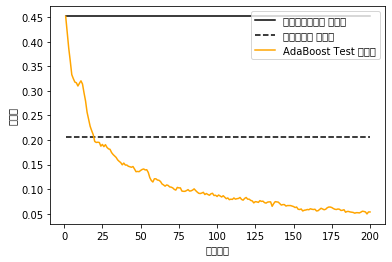

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier
# 设置AdaBoost迭代次数
n_estimators=200
# 使用make_hastie_10_2 函数生成二分类数据。假设我们生成 12000 个数据，取前 2000 个作为测试集，其余作为训练集
X,y=datasets.make_hastie_10_2(n_samples=12000,random_state=1)
# 从12000个数据中取前2000行作为测试集，其余作为训练集
train_x, train_y = X[2000:],y[2000:]
test_x, test_y = X[:2000],y[:2000]
# 弱分类器
dt_stump = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(train_x, train_y)
dt_stump_err = 1.0-dt_stump.score(test_x, test_y)
# 决策树分类器
dt = DecisionTreeClassifier()
dt.fit(train_x,  train_y)
dt_err = 1.0-dt.score(test_x, test_y)
# AdaBoost分类器
ada = AdaBoostClassifier(base_estimator=dt_stump,n_estimators=n_estimators)
ada.fit(train_x,  train_y)
# 三个分类器的错误率可视化
fig = plt.figure()
# 设置plt正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
ax = fig.add_subplot(111)
ax.plot([1,n_estimators],[dt_stump_err]*2, 'k-', label=u'决策树弱分类器 错误率')
ax.plot([1,n_estimators],[dt_err]*2,'k--', label=u'决策树模型 错误率')
ada_err = np.zeros((n_estimators,))
# 遍历每次迭代的结果 i为迭代次数, pred_y为预测结果
for i,pred_y in enumerate(ada.staged_predict(test_x)):
     # 统计错误率
    ada_err[i]=zero_one_loss(pred_y, test_y)
# 绘制每次迭代的AdaBoost错误率 
ax.plot(np.arange(n_estimators)+1, ada_err, label='AdaBoost Test 错误率', color='orange')
ax.set_xlabel('迭代次数')
ax.set_ylabel('错误率')
leg=ax.legend(loc='upper right',fancybox=True)
plt.show()